In [1]:
# Import pakietów
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Wczytywanie danych
file_path = 'messy_data.csv'
data = pd.read_csv(file_path)

In [3]:
data

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.50,IF,D,Ideal,5.1,5.15,3.2,61.5,,3000
1,0.70,vvs2,E,premium,5.7,,3.52,62,59,4500
2,NaN,Si2,h,Good,4.3,4.31,,62.3,56,700
3,1.20,if,d,ideal,,6.82,4.2,61.7,58,10000
4,0.90,I1,J,Fair,6,,3.7,61.7,,2400
...,...,...,...,...,...,...,...,...,...,...
195,0.45,si1,F,very good,4.9,4.89,,62.4,59,2300
196,1.25,VVS2,H,Good,6.9,,4.27,,55,10400
197,0.55,i1,I,Premium,5.3,,3.28,62.3,57,150000
198,0.85,Si2,E,fair,6.1,6.13,3.78,,58,6300


In [4]:
# Usuwanie duplikatów
data_cleaned = data.drop_duplicates()

In [5]:
data_cleaned

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.50,IF,D,Ideal,5.1,5.15,3.2,61.5,,3000
1,0.70,vvs2,E,premium,5.7,,3.52,62,59,4500
2,NaN,Si2,h,Good,4.3,4.31,,62.3,56,700
3,1.20,if,d,ideal,,6.82,4.2,61.7,58,10000
4,0.90,I1,J,Fair,6,,3.7,61.7,,2400
...,...,...,...,...,...,...,...,...,...,...
195,0.45,si1,F,very good,4.9,4.89,,62.4,59,2300
196,1.25,VVS2,H,Good,6.9,,4.27,,55,10400
197,0.55,i1,I,Premium,5.3,,3.28,62.3,57,150000
198,0.85,Si2,E,fair,6.1,6.13,3.78,,58,6300


In [6]:
# Można zauważyć, że nie ma duplikatów w danych
# Zerknijmy na braki w danych i przeanalizujmy po kolei wszystkie kolumny
data_cleaned.isna().sum()

carat           50
 clarity         0
 color           0
 cut             0
 x dimension     0
 y dimension     0
 z dimension     0
 depth           0
 table           0
 price           0
dtype: int64

count    150.000000
mean       0.799000
std        0.321827
min        0.200000
25%        0.512500
50%        0.750000
75%        1.050000
max        1.600000
Name: carat, dtype: float64

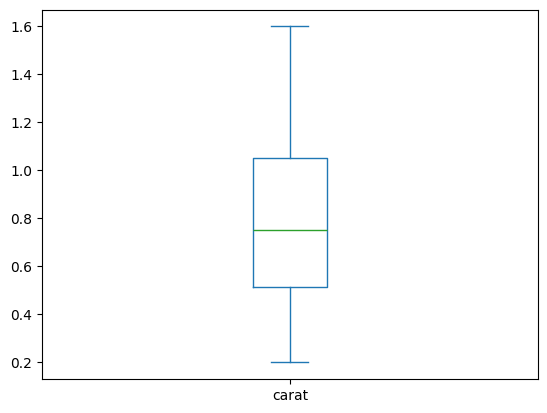

In [7]:
# Kolumna carat
# Mamy 50 brakującch danych w kolumnie carat
data_cleaned['carat'].plot.box()
data_cleaned['carat'].describe()

In [8]:
# Uzupełnijmy braki srednią - brak wartosci ostajacych 
data_cleaned['carat'].fillna(data_cleaned['carat'].mean(), inplace=True)

In [9]:
# Usunięcie dodatkowych spacji w nazwach kolumn
data_cleaned.columns = data_cleaned.columns.str.strip()  

In [10]:
# Kolumna  clarity
# Zerknijmy na zawartosc
data_cleaned['clarity'].value_counts()

clarity
i1      26
si2     23
VVS1    23
IF      20
VVS2    19
vvs2    18
si1     18
Si2     16
Si1     12
vvs1    11
I1       5
SI2      5
if       3
Vvs1     1
Name: count, dtype: int64

In [11]:
# Dużo podobnych nazw - zapiszmy wszyskie z małej litery
data_cleaned['clarity'] = data_cleaned['clarity'].apply(lambda x: x.lower())
data_cleaned['clarity'].value_counts()

clarity
si2     44
vvs2    37
vvs1    35
i1      31
si1     30
if      23
Name: count, dtype: int64

In [12]:
# Kolumna  color - analogicznie jak clarity
data_cleaned['color'] = data_cleaned['color'].apply(lambda x: x.lower())
data_cleaned['color'].value_counts()

color
g            40
h            34
i            33
f            30
e            25
d            22
j             8
colorless     8
Name: count, dtype: int64

In [13]:
# Kolumna  cut (analogia)
data_cleaned['cut'] = data_cleaned['cut'].apply(lambda x: x.lower())
data_cleaned['cut'].value_counts()

cut
good         51
premium      41
very good    40
fair         36
ideal        32
Name: count, dtype: int64

In [14]:
data_cleaned

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.500,if,d,ideal,5.1,5.15,3.2,61.5,,3000
1,0.700,vvs2,e,premium,5.7,,3.52,62,59,4500
2,0.799,si2,h,good,4.3,4.31,,62.3,56,700
3,1.200,if,d,ideal,,6.82,4.2,61.7,58,10000
4,0.900,i1,j,fair,6,,3.7,61.7,,2400
...,...,...,...,...,...,...,...,...,...,...
195,0.450,si1,f,very good,4.9,4.89,,62.4,59,2300
196,1.250,vvs2,h,good,6.9,,4.27,,55,10400
197,0.550,i1,i,premium,5.3,,3.28,62.3,57,150000
198,0.850,si2,e,fair,6.1,6.13,3.78,,58,6300


In [15]:
# Wymienione ponizej kolumny zawierają dużo znaków pustych '', docelowo mają być numeryczne.
# Dokonajmy konwersji typów.
# Zauważalne jest częste występowanie pustych znaków '' - zamieńmy na NaN
data_cleaned.replace('', pd.NA, inplace=True)

In [16]:
numeric_columns = ['x dimension', 'y dimension', 'z dimension', 'depth', 'table', 'price']

# Konwersja typów danych (jesli niemozliwa - wstawiamy NaN.)
for col in numeric_columns:
    data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')

<Axes: >

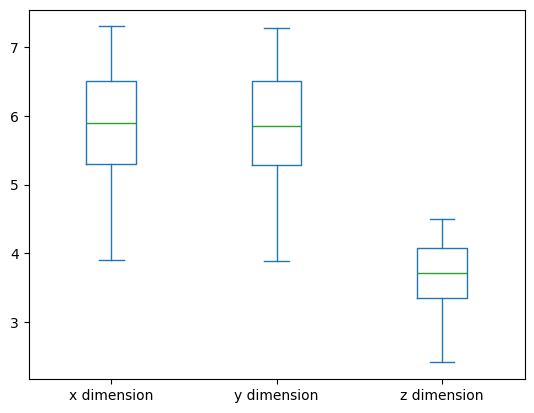

In [17]:
# Kolumna  x dimension
# Kolumna  y dimension
# Kolumna  z dimension
data_cleaned[['x dimension', 'y dimension', 'z dimension']].describe()
data_cleaned[['x dimension', 'y dimension', 'z dimension']].plot.box()

In [18]:
data_cleaned.isna().sum()

carat           0
clarity         0
color           0
cut             0
x dimension     3
y dimension    64
z dimension    48
depth          67
table          33
price           4
dtype: int64

In [19]:
# Nie zauważony wartosci odstających - wypełniamy braki w danych srednimi
for col in ['x dimension', 'y dimension', 'z dimension']:
    data_cleaned[col].fillna(data_cleaned[col].mean(), inplace=True)

<Axes: >

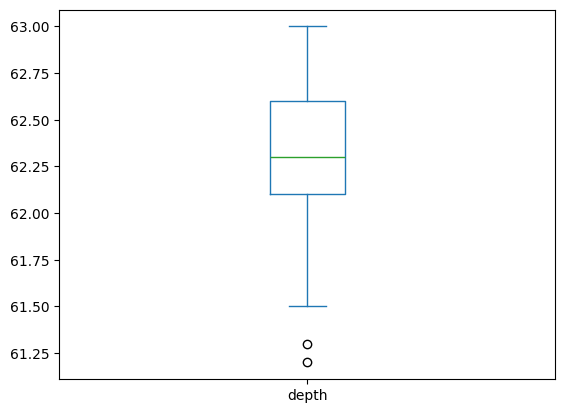

In [20]:
# Kolumna depth
data_cleaned['depth'].plot.box()

count    133.000000
mean      62.316541
std        0.326408
min       61.200000
25%       62.100000
50%       62.300000
75%       62.600000
max       63.000000
Name: depth, dtype: float64

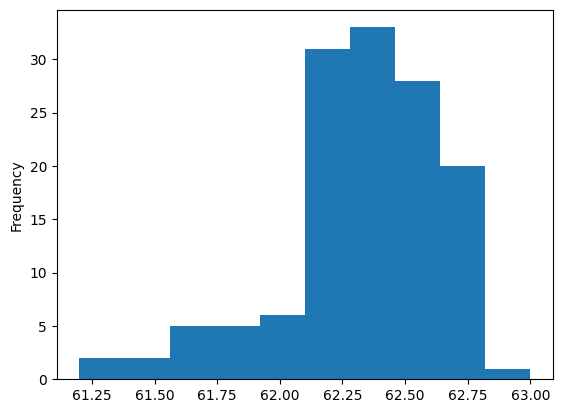

In [21]:
data_cleaned['depth'].plot.hist()
data_cleaned['depth'].describe()

In [22]:
# Z racji wystąpienia wartosci odstających oraz braku rozkładu normalnego - wypełniamy medianą. 
data_cleaned['depth'].fillna(data_cleaned['depth'].median(), inplace=True)

count    167.000000
mean      56.910180
std        1.421972
min       54.000000
25%       56.000000
50%       57.000000
75%       58.000000
max       60.000000
Name: table, dtype: float64

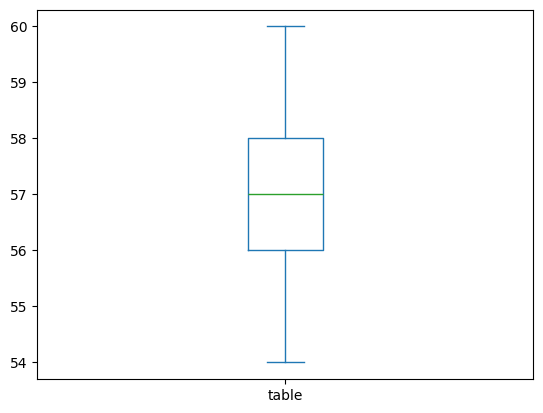

In [23]:
# Kolumna table
data_cleaned['table'].plot.box()
data_cleaned['table'].describe()

In [24]:
# Uzupełniamy braki srednią
data_cleaned['table'].fillna(data_cleaned['table'].mean(), inplace=True)

<Axes: >

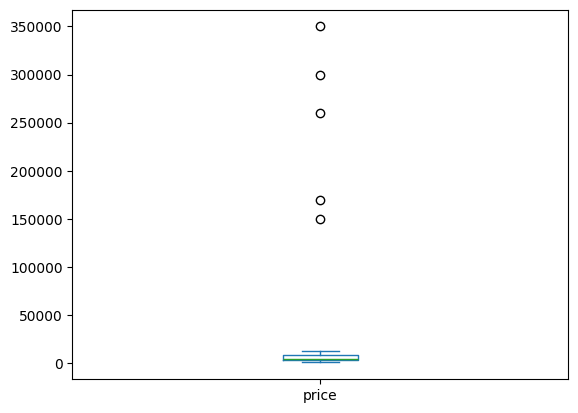

In [25]:
# Kolumna price
data_cleaned['price'].plot.box()

count       196.000000
mean      11410.714286
std       40072.669086
min         500.000000
25%        2600.000000
50%        4350.000000
75%        7900.000000
max      350000.000000
Name: price, dtype: float64

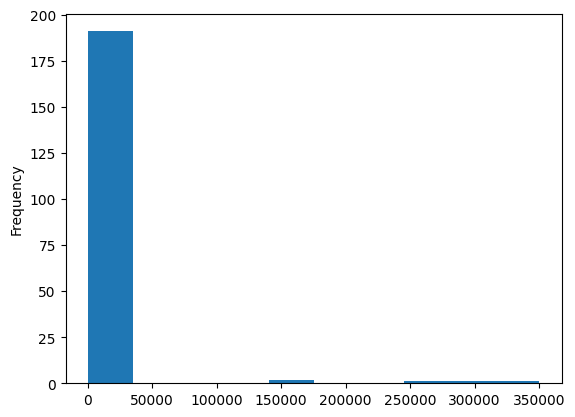

In [26]:
data_cleaned['price'].plot.hist()
data_cleaned['price'].describe()

In [27]:
# Bardzo dużo wartosci ostajacych - rezygnujemy z uzueplniania i usuwamy rekordy bez okreslonej
# zmiennej celu (price). Ewentualnie można je wykorzystać jako dane bazowe do predykcji po zbudowaniu
# modelu regresji, gdyż reprezentują jakies (niewycenione) najprawodpodobniej kamienie szlachetne.
data_cleaned.isna().sum()

carat          0
clarity        0
color          0
cut            0
x dimension    0
y dimension    0
z dimension    0
depth          0
table          0
price          4
dtype: int64

In [28]:
# Usuwamy więc te 4 rekordy
data_cleaned.dropna(inplace = True)

data_cleaned = data_cleaned.reset_index(drop = True)

In [29]:
# Identyfikacja danych odstających 
# Po uzuepłnieniu braków mogły pojawić się dane odstające. Na pewno bardzo dużą liczbę danych 
# odstających zidentyfikowano w kolumnie cena podczas imputacji danych.

In [30]:
# Zerknijmy na dane odstające (kolumny numeryczne, gdyż w pozostałych nie odkryto outlierów)
numeric_columns = ['carat', 'x dimension', 'y dimension', 'z dimension', 'depth', 'table', 'price']

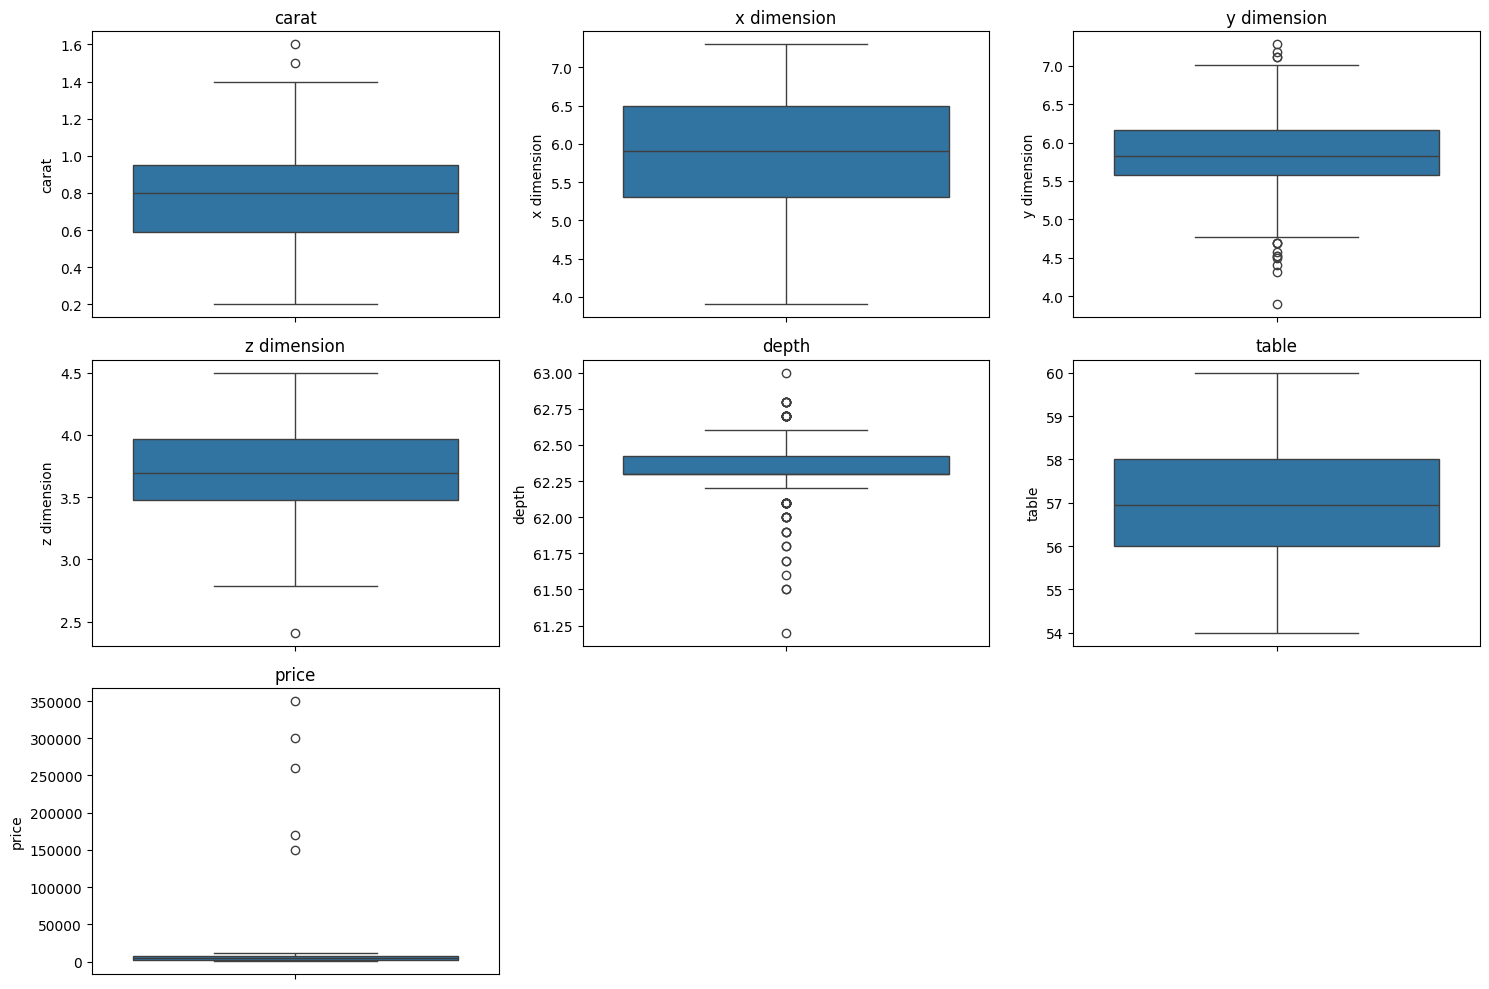

In [31]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=data_cleaned[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [32]:
# Kolumnach carat, y dimension, depth i oczywiscie price: wartosci odstające są widoczne.  

In [33]:
# Obsługa wartości odstających - metoda 3sigma
def rm_sigma(dataFrame, col_name = 'Cena', sigma = 3):
    mean = dataFrame[col_name].mean()
    std = dataFrame[col_name].std()
    sigma_thresh_up = sigma * std + mean
    sigma_thres_down = mean - sigma * std
    # Usun wartosci odstajace
    dataFrame = dataFrame[(dataFrame[col_name] < sigma_thresh_up) & (dataFrame[col_name] > sigma_thres_down)]
    
    return dataFrame

In [34]:
# Usun wartosci odstajace z wykorzystaniem funkcji rm_sigma (met. 3 sigm)
df_clear = rm_sigma(data_cleaned, col_name='carat', sigma = 3).reset_index(drop=True)
df_clear = rm_sigma(df_clear, col_name='y dimension', sigma = 3).reset_index(drop=True)
df_clear = rm_sigma(df_clear, col_name='depth', sigma = 3).reset_index(drop=True)
df_clear = rm_sigma(df_clear, col_name='price', sigma = 3).reset_index(drop=True)

In [35]:
df_clear

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.700,vvs2,e,premium,5.700000,5.829706,3.520000,62.0,59.00000,4500.0
1,0.799,si2,h,good,4.300000,4.310000,3.694671,62.3,56.00000,700.0
2,1.200,if,d,ideal,5.885787,6.820000,4.200000,61.7,58.00000,10000.0
3,0.900,i1,j,fair,6.000000,5.829706,3.700000,61.7,56.91018,2400.0
4,0.799,si1,g,very good,5.900000,5.920000,3.630000,62.3,57.00000,4200.0
...,...,...,...,...,...,...,...,...,...,...
182,0.950,si1,g,ideal,6.400000,6.420000,3.960000,62.3,56.00000,7100.0
183,0.450,si1,f,very good,4.900000,4.890000,3.694671,62.4,59.00000,2300.0
184,1.250,vvs2,h,good,6.900000,5.829706,4.270000,62.3,55.00000,10400.0
185,0.850,si2,e,fair,6.100000,6.130000,3.780000,62.3,58.00000,6300.0


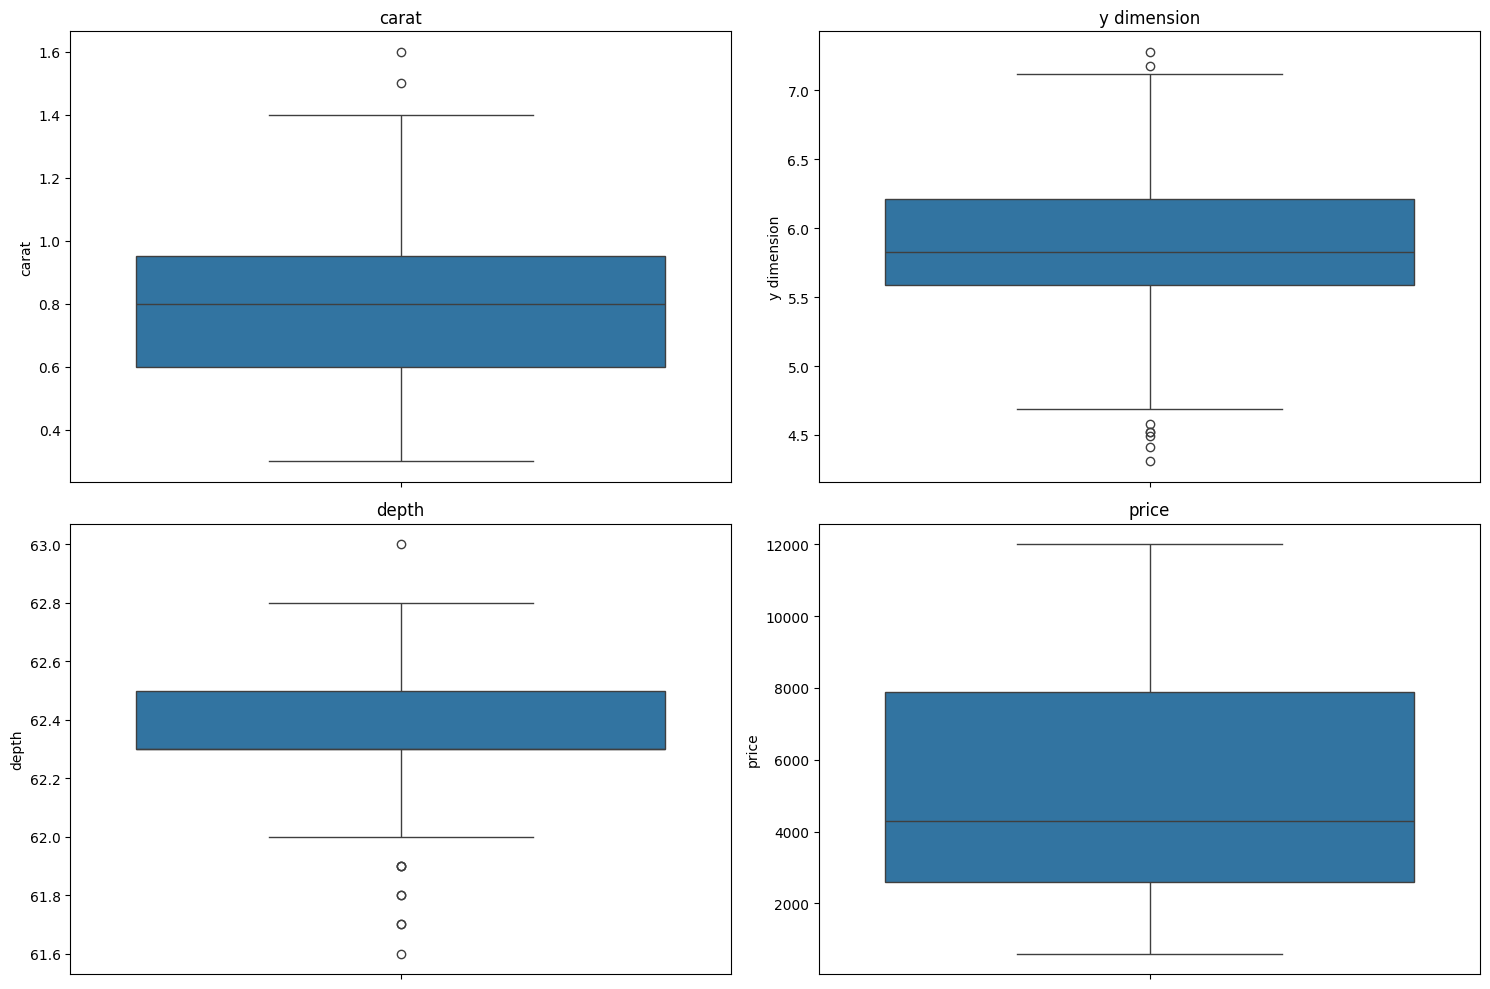

In [36]:
# Replotting the boxplots to see the effect of capping
plt.figure(figsize=(15, 10))
for i, col in enumerate(['carat', 'y dimension', 'depth', 'price']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df_clear[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [37]:
# Dane odstające zostały zredukowane

In [38]:
# Dane kategoryczne
categorical_columns = ['clarity', 'color', 'cut']

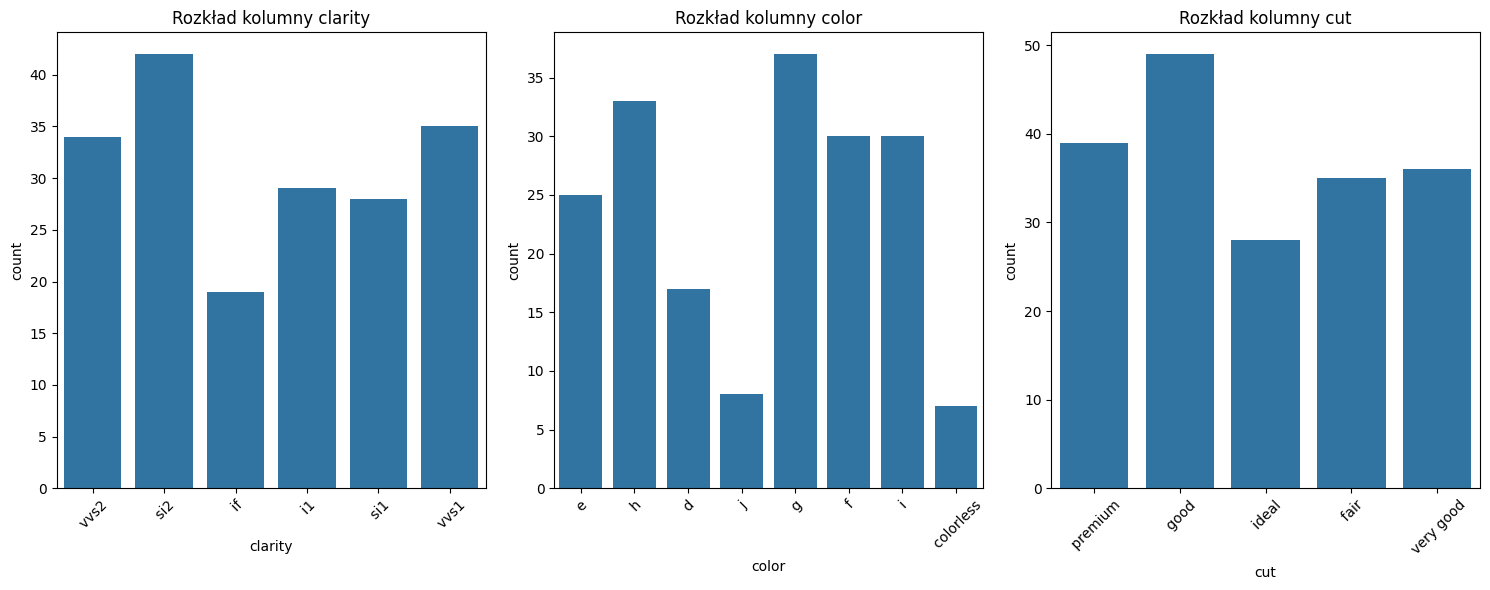

In [39]:
# Histogram danych kategorycznych
plt.figure(figsize=(15, 6))
for i, col in enumerate(categorical_columns):
    plt.subplot(1, 3, i+1)
    sns.countplot(data=df_clear, x=col)
    plt.title(f"Rozkład kolumny {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

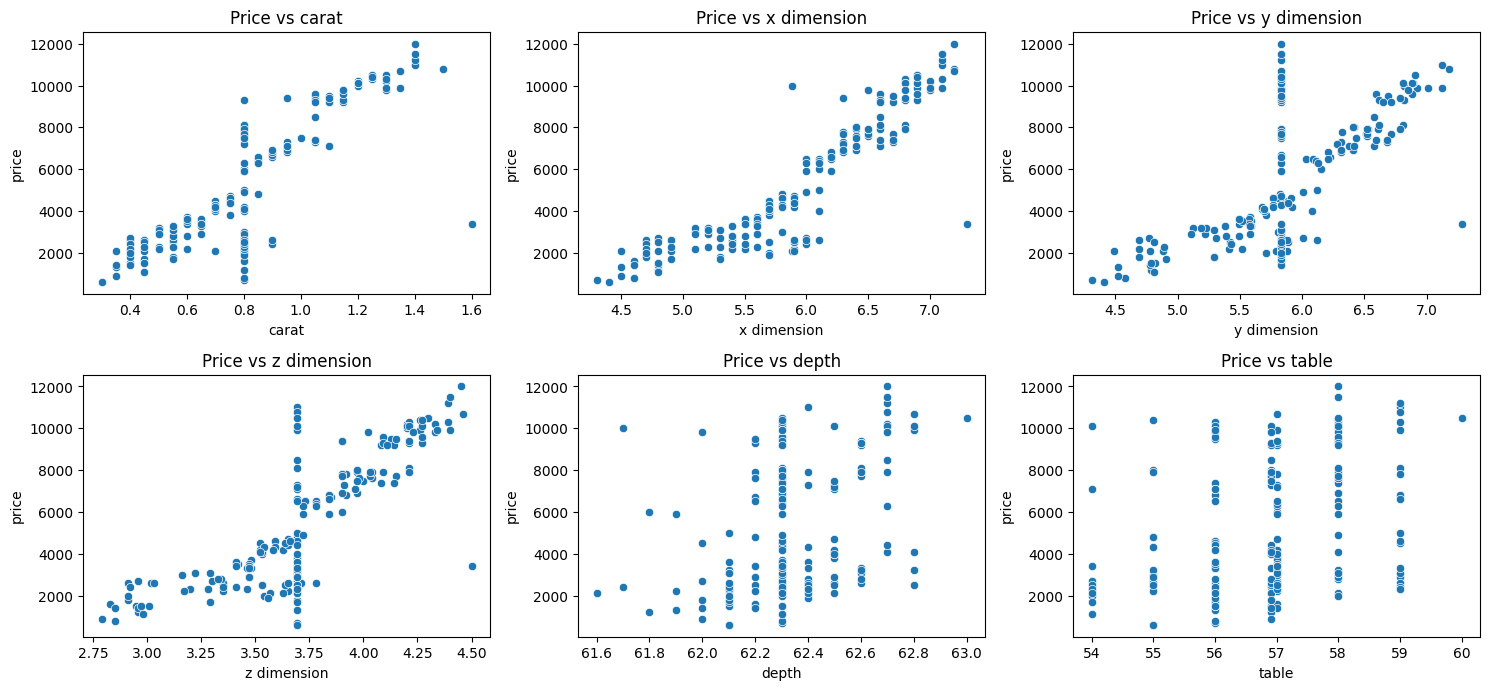

In [40]:
# Zależnosci między cechami numerycznymi, a kolumną price
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(data=df_clear, x=col, y='price')
    plt.title(f"Price vs {col}")

plt.tight_layout()
plt.show()

In [41]:
# Aktualnie przeglądając wyniki można zauważyć, że im więcej waży i im większy kamień, tym wieksza cena.

In [42]:
# Dokonujemy one hot encodingu cech kategorycznych
df_clear = pd.get_dummies(df_clear, columns = ['clarity', 'color', 'cut'], dtype=float)

In [43]:
# Przygotowanie danych do modelu regresji
X = df_clear.drop('price', axis=1)
y = df_clear['price']

In [44]:
# Podział danych na trenignowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
# Eliminacja wsteczna z wykorzystaniem pakietu ols
import statsmodels.api as sm

# Eliminacja wsteczna
def backward_elimination(data, target, significance_level=0.05):
    features = data.columns.tolist()
    while len(features) > 1:
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:] # Ignorujemy stałą
        max_p_value = p_values.max()
        if max_p_value >= significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

In [46]:
# Wybieramy cechy
selected_features = backward_elimination(X_train, y_train)

In [47]:
selected_features

['carat',
 'x dimension',
 'clarity_ i1',
 'clarity_ si1',
 'clarity_ si2',
 'cut_ fair',
 'cut_ good',
 'cut_ ideal',
 'cut_ premium',
 'cut_ very good']

In [48]:
# Wybrane cechy
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Budowa modelu regresji
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Predykcje dla danych testowych
y_pred = model.predict(X_test_selected)

# Ocena modelu
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [49]:
rmse,r2

(1075.8923660056241, 0.8690241548534942)

Text(0, 0.5, 'y_pred')

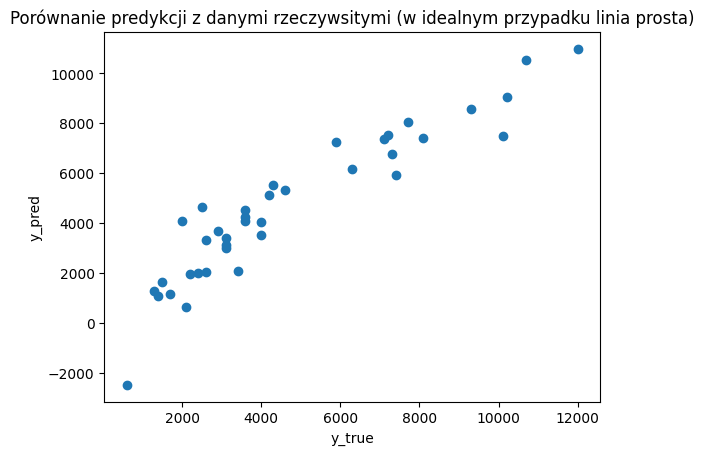

In [50]:
# Predykcja vs rzeczywsite
plt.scatter(y_test, y_pred)
plt.title('Porównanie predykcji z danymi rzeczywsitymi (w idealnym przypadku linia prosta)')
plt.xlabel('y_true')
plt.ylabel('y_pred')

In [51]:
# Zapis modelu i gotowych danych celem wykorzystania w dashboardzie
X_train_selected['price'] = y_train
X_test_selected['price'] = y_test

X_train_selected.to_csv('xtrain_selected.csv', index=False)
X_test_selected.to_csv('xtest_selected.csv', index=False)

# Zapis modelu
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

Po dokonaniu zapisu możemy przejść do uruchomienia dashboardu. Uruchamiamy wiersz poleceń w katalogu z plikiem dashboard.py i uruchamiamy polecenie python .\dashboard.py 

Następnie przechodzimy w przeglądarce do strony wyświetlonej w konsoli. Domyślnie powinno być to: 
http://127.0.0.1:8050/